In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [3]:
data1.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [4]:
data1.shape

(50005, 18)

In [5]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [6]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [8]:
#number of unique genres
set(data1["music_genre"])

{'Alternative',
 'Anime',
 'Blues',
 'Classical',
 'Country',
 'Electronic',
 'Hip-Hop',
 'Jazz',
 'Rap',
 'Rock'}

## What to do with Tempo column

In [9]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


In [10]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric 
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Now 'Tempo' column contains values without "?"

print(len(data1[data1["tempo"] == "?"]))
print(len(data1))


0
50000


In [11]:
data1.isnull().sum()

instance_id            0
artist_name            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               4980
obtained_date          0
valence                0
music_genre            0
dtype: int64

## Label and One Hot encoding variables in data 1

In [13]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1, onehotdf], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
#data1
onehotdf

,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.290453      0.356420    -0.083809   
acousticness       -0.290453      1.000000     -0.347681     0.061862   
danceability        0.356420     -0.347681      1.000000    -0.155507   
duration_ms        -0.083809      0.061862     -0.155507     1.000000   
energy              0.216345     -0.791250      0.263934    -0.066203   
instrumentalness   -0.364960      0.387970     -0.301277     0.129738   
key_num            -0.005212      0.005796     -0.017777    -0.004293   
liveness           -0.039468     -0.109220     -0.051465     0.019911   
loudness            0.317941     -0.730401      0.390859    -0.102509   
mode_num            0.013427     -0.025161      0.049634     0.014042   
speechiness         0.224309     -0.163377      0.279767    -0.083636   
valence             0.124913     -0.270238      0.434557    -0.130574   
music_genre_num     0.502133     -0.097969      0.3

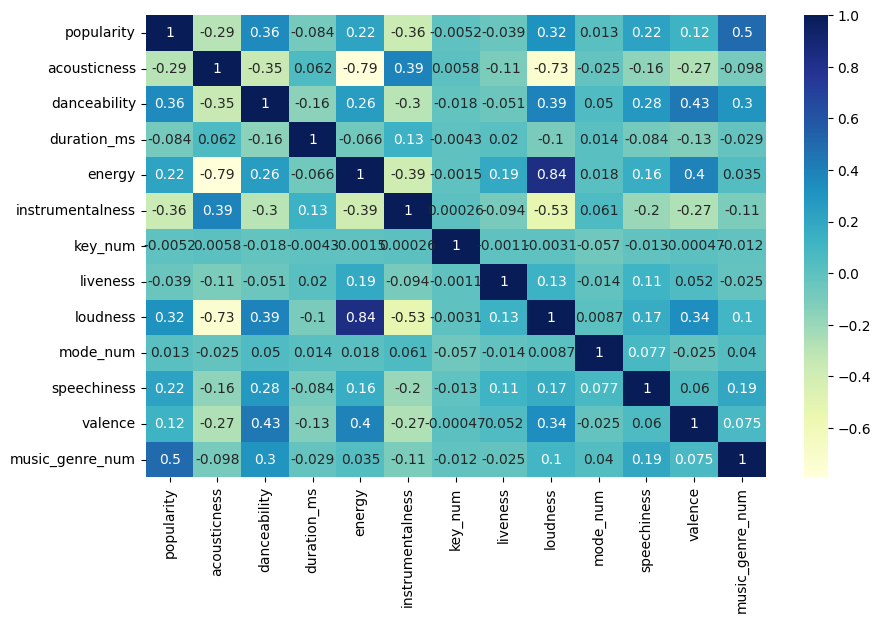

In [14]:
#not including tempo for now
selected_data1 = data1[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key_num", "liveness", "loudness", "mode_num", "speechiness", "valence", "music_genre_num"]]
print(selected_data1.corr()) 
# plotting correlation heatmap 
plt.figure(figsize=(10,6))
data1plot = sns.heatmap(selected_data1.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

## Distribution of the Features

In [15]:
#not including tempo
features = ["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key_num", "liveness", "loudness", "mode_num", "speechiness", "valence"]
len(features)

12

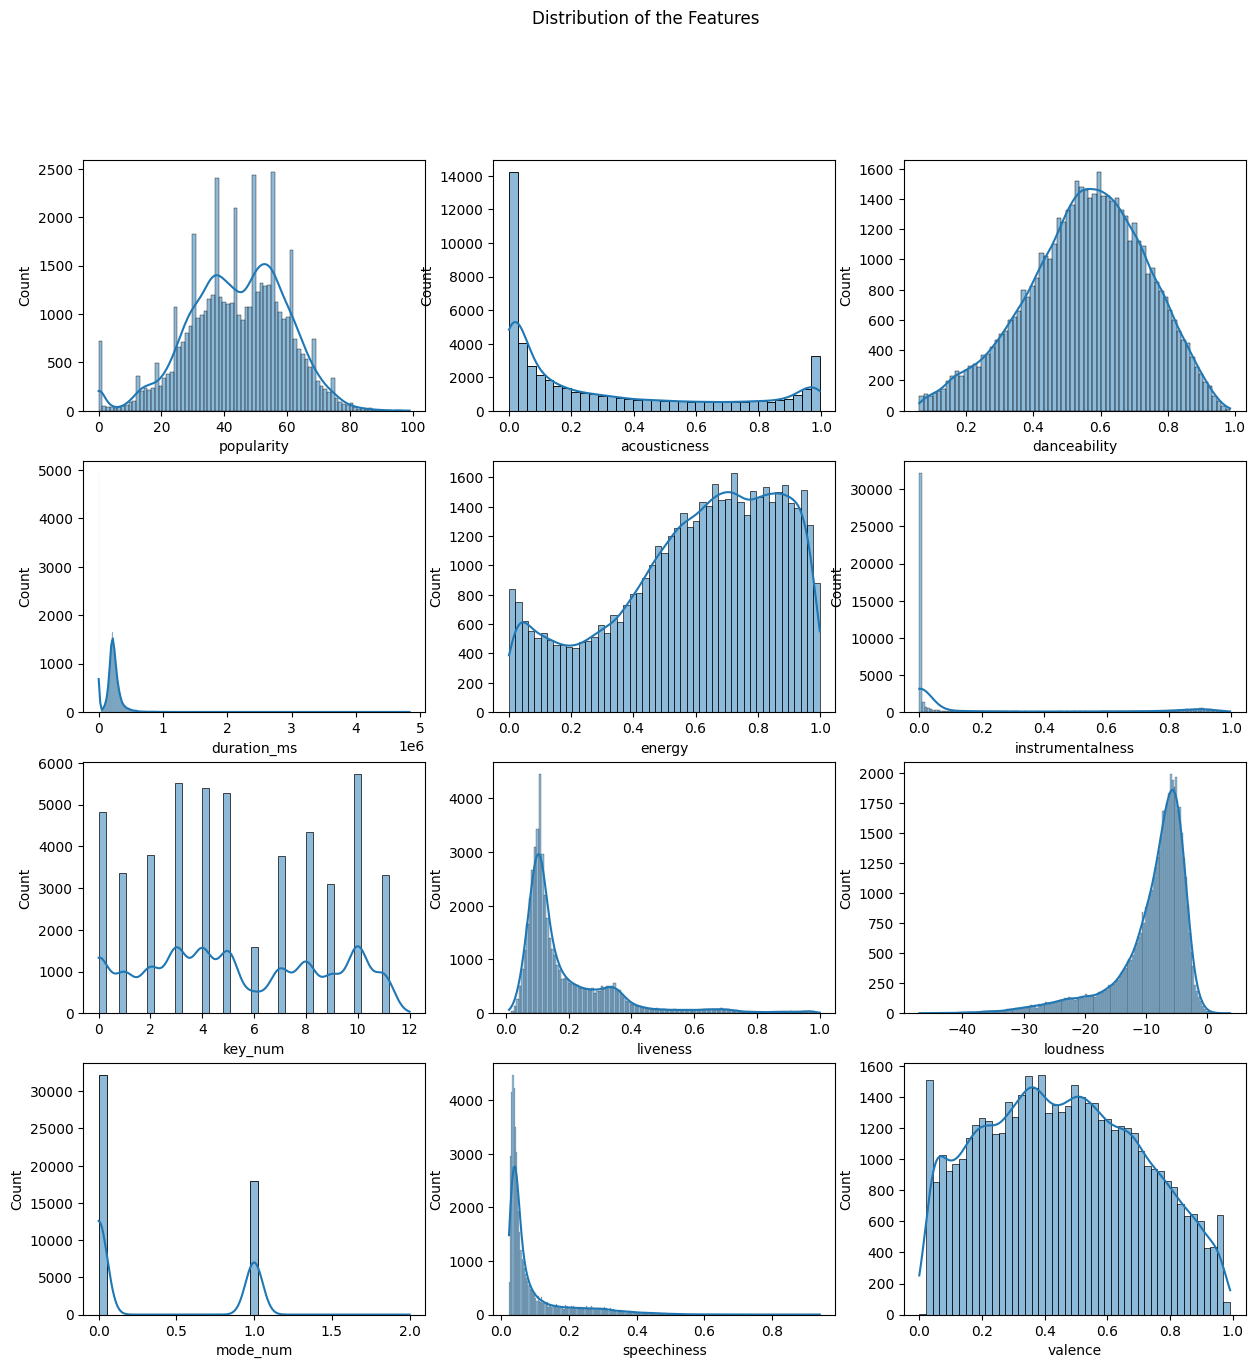

In [16]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Distribution of the Features')
x = 0
y = 0
for f, ax in zip(features, axs.flat):
    sns.histplot(data1[f], kde = True, ax=ax)
    ax.set_xlabel(f)


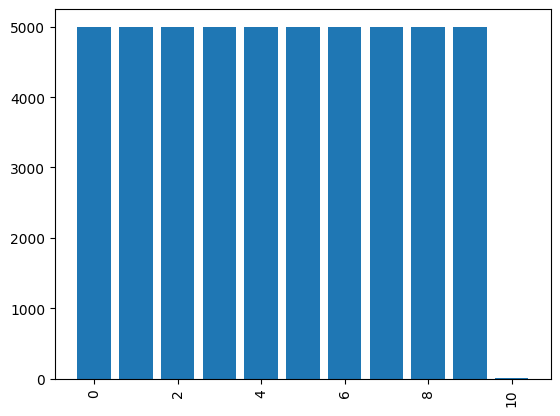

In [18]:
unique_label, counts = np.unique(data1["music_genre_num"], return_counts=True)
# Create a bar chart
plt.bar(unique_label, counts)

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>